<a href="https://colab.research.google.com/github/peer7867/final-project/blob/main/PEER_MOHAMED_A(DW28).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import important libraries
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# import warnings for ignore warnings
import warnings
warnings.filterwarnings("ignore")  

In [ ]:
df=pd.read_csv("/content/train.csv")
df

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58,management,married,tertiary,unknown,5,may,261,1,unknown,no
1,44,technician,single,secondary,unknown,5,may,151,1,unknown,no
2,33,entrepreneur,married,secondary,unknown,5,may,76,1,unknown,no
3,47,blue-collar,married,unknown,unknown,5,may,92,1,unknown,no
4,33,unknown,single,unknown,unknown,5,may,198,1,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,cellular,17,nov,977,3,unknown,yes
45207,71,retired,divorced,primary,cellular,17,nov,456,2,unknown,yes
45208,72,retired,married,secondary,cellular,17,nov,1127,5,success,yes
45209,57,blue-collar,married,secondary,telephone,17,nov,508,4,unknown,no


In [ ]:
# check the shape of the data
df.shape  

(45211, 11)

Data Cleaning




HANDLING MISSING VALUES

In [ ]:
# find the null values
df.isnull().sum()

age               0
job               0
marital           0
education_qual    0
call_type         0
day               0
mon               0
dur               0
num_calls         0
prev_outcome      0
y                 0
dtype: int64

We can see there are no null values, so we can move forward

In [ ]:
# check duplicate values
df[df.duplicated()]

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
6893,34,services,married,secondary,unknown,28,may,124,1,unknown,no
8138,29,admin.,single,secondary,unknown,2,jun,121,4,unknown,no
11630,39,blue-collar,married,primary,unknown,19,jun,112,4,unknown,no
13400,36,blue-collar,married,secondary,cellular,9,jul,183,1,unknown,no
19826,36,management,married,tertiary,cellular,8,aug,75,2,unknown,no
19854,32,technician,single,tertiary,cellular,8,aug,31,2,unknown,no


In [ ]:
# drop duplicate values
df.drop_duplicates(inplace=True, keep = 'first')

In [ ]:
# check duplicate values after removing
df[df.duplicated()]

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y


CHECKING DATATYPE

In [ ]:
# check data type of our data
df.dtypes 

age                int64
job               object
marital           object
education_qual    object
call_type         object
day                int64
mon               object
dur                int64
num_calls          int64
prev_outcome      object
y                 object
dtype: object

Change Data Type Of Some Columns

In [ ]:
df['age'] = df['age'].astype(int)
df['day'] = df['day'].astype(int)
df['dur'] = df['dur'].astype(int)
df['num_calls'] = df['num_calls'].astype(int)

Now all the data type are correct





COLUMN NAMES CHANGING

In [ ]:
# rename of some column for better understanding
df=df.rename(columns={"mon":"month","dur":"duration", 'y':'result'})

OUTLIER DETECTION

In [ ]:
# check outliers by describe
df.describe()

,age,day,duration,num_calls
count,45205.000000,45205.00000,45205.000000,45205.000000
mean,40.937087,15.80688,258.183055,2.763898
std,10.619130,8.32234,257.538504,3.098189
min,18.000000,1.00000,0.000000,1.000000
25%,33.000000,8.00000,103.000000,1.000000
50%,39.000000,16.00000,180.000000,2.000000
75%,48.000000,21.00000,319.000000,3.000000
max,95.000000,31.00000,4918.000000,63.000000


Check Outliers

In [ ]:
#age column outlier removal
q1,q3=np.percentile(df["age"],[25,75])
IQR=q3-q1
upper=q3+1.5*IQR
lower=q1-1.5*IQR
print("upper age bound:",upper,"lower age bound :", lower)
age=[]
for i in df["age"]:
  if lower<=i<=upper:
    age.append(i)
print(len(age))
print(df.shape)

upper age bound: 70.5 lower age bound : 10.5
44718
(45205, 11)


In [ ]:
# Numerical column cleaning
#duration column outlier removal
q1,q3=np.percentile(df["duration"],[25,75])
IQR=q3-q1
upper=q3+1.5*IQR
lower=q1-1.5*IQR
print("upper call duration:",upper,"lower call duration:", lower)
dur=[]
for i in df["duration"]:
  if lower<=i<=upper:
    dur.append(i)
print(len(dur))

upper call duration: 643.0 lower call duration: -221.0
41970


In [ ]:
#num_calls outlier detection
q1,q3=np.percentile(df["num_calls"],[25,75])
IQR=q3-q1
upper=q3+1.5*IQR
lower=q1-1.5*IQR
print("upper num_calls:",upper,"lower num_calls", lower)
num_calls=[]
for i in df["num_calls"]:
  if lower<=i<=upper:
    num_calls.append(i)
print(len(num_calls))

upper num_calls: 6.0 lower num_calls -2.0
42141


In [ ]:
df.result.value_counts()

no     39916
yes     5289
Name: result, dtype: int64

In [ ]:
df[(df['age']>70.5) & (df['result'] == 'yes')].shape

(218, 11)

In [ ]:
df[(df['duration']>643) & (df['result'] == 'yes')].shape

(1651, 11)

In [ ]:
df[(df['num_calls']>6) & (df['result'] == 'yes')].shape

(161, 11)

Interpretation:- Extrem values are also very important, so we can't drop it

In [ ]:
# remove all the outliers and assign into new variable
df_out_drop=df[(df["age"].isin(age)) & (df["duration"].isin(dur)) & (df["num_calls"].isin(num_calls))]

In [ ]:
# check shape of new dataframe
df_out_drop.shape

(38661, 11)

EXPLORATORY DATA **ANALYSIS**

<AxesSubplot:>

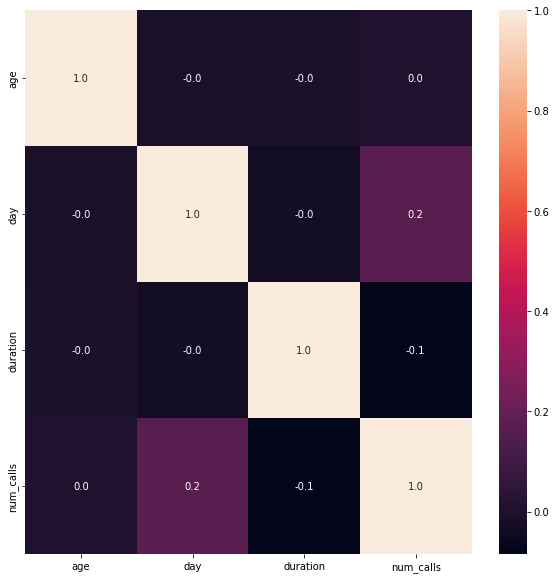

In [ ]:
#lets check whether linear relationship exists between numeric fetures and target using pearson correlation coeff
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True, fmt='.1f')

Check Feature **Distribution**

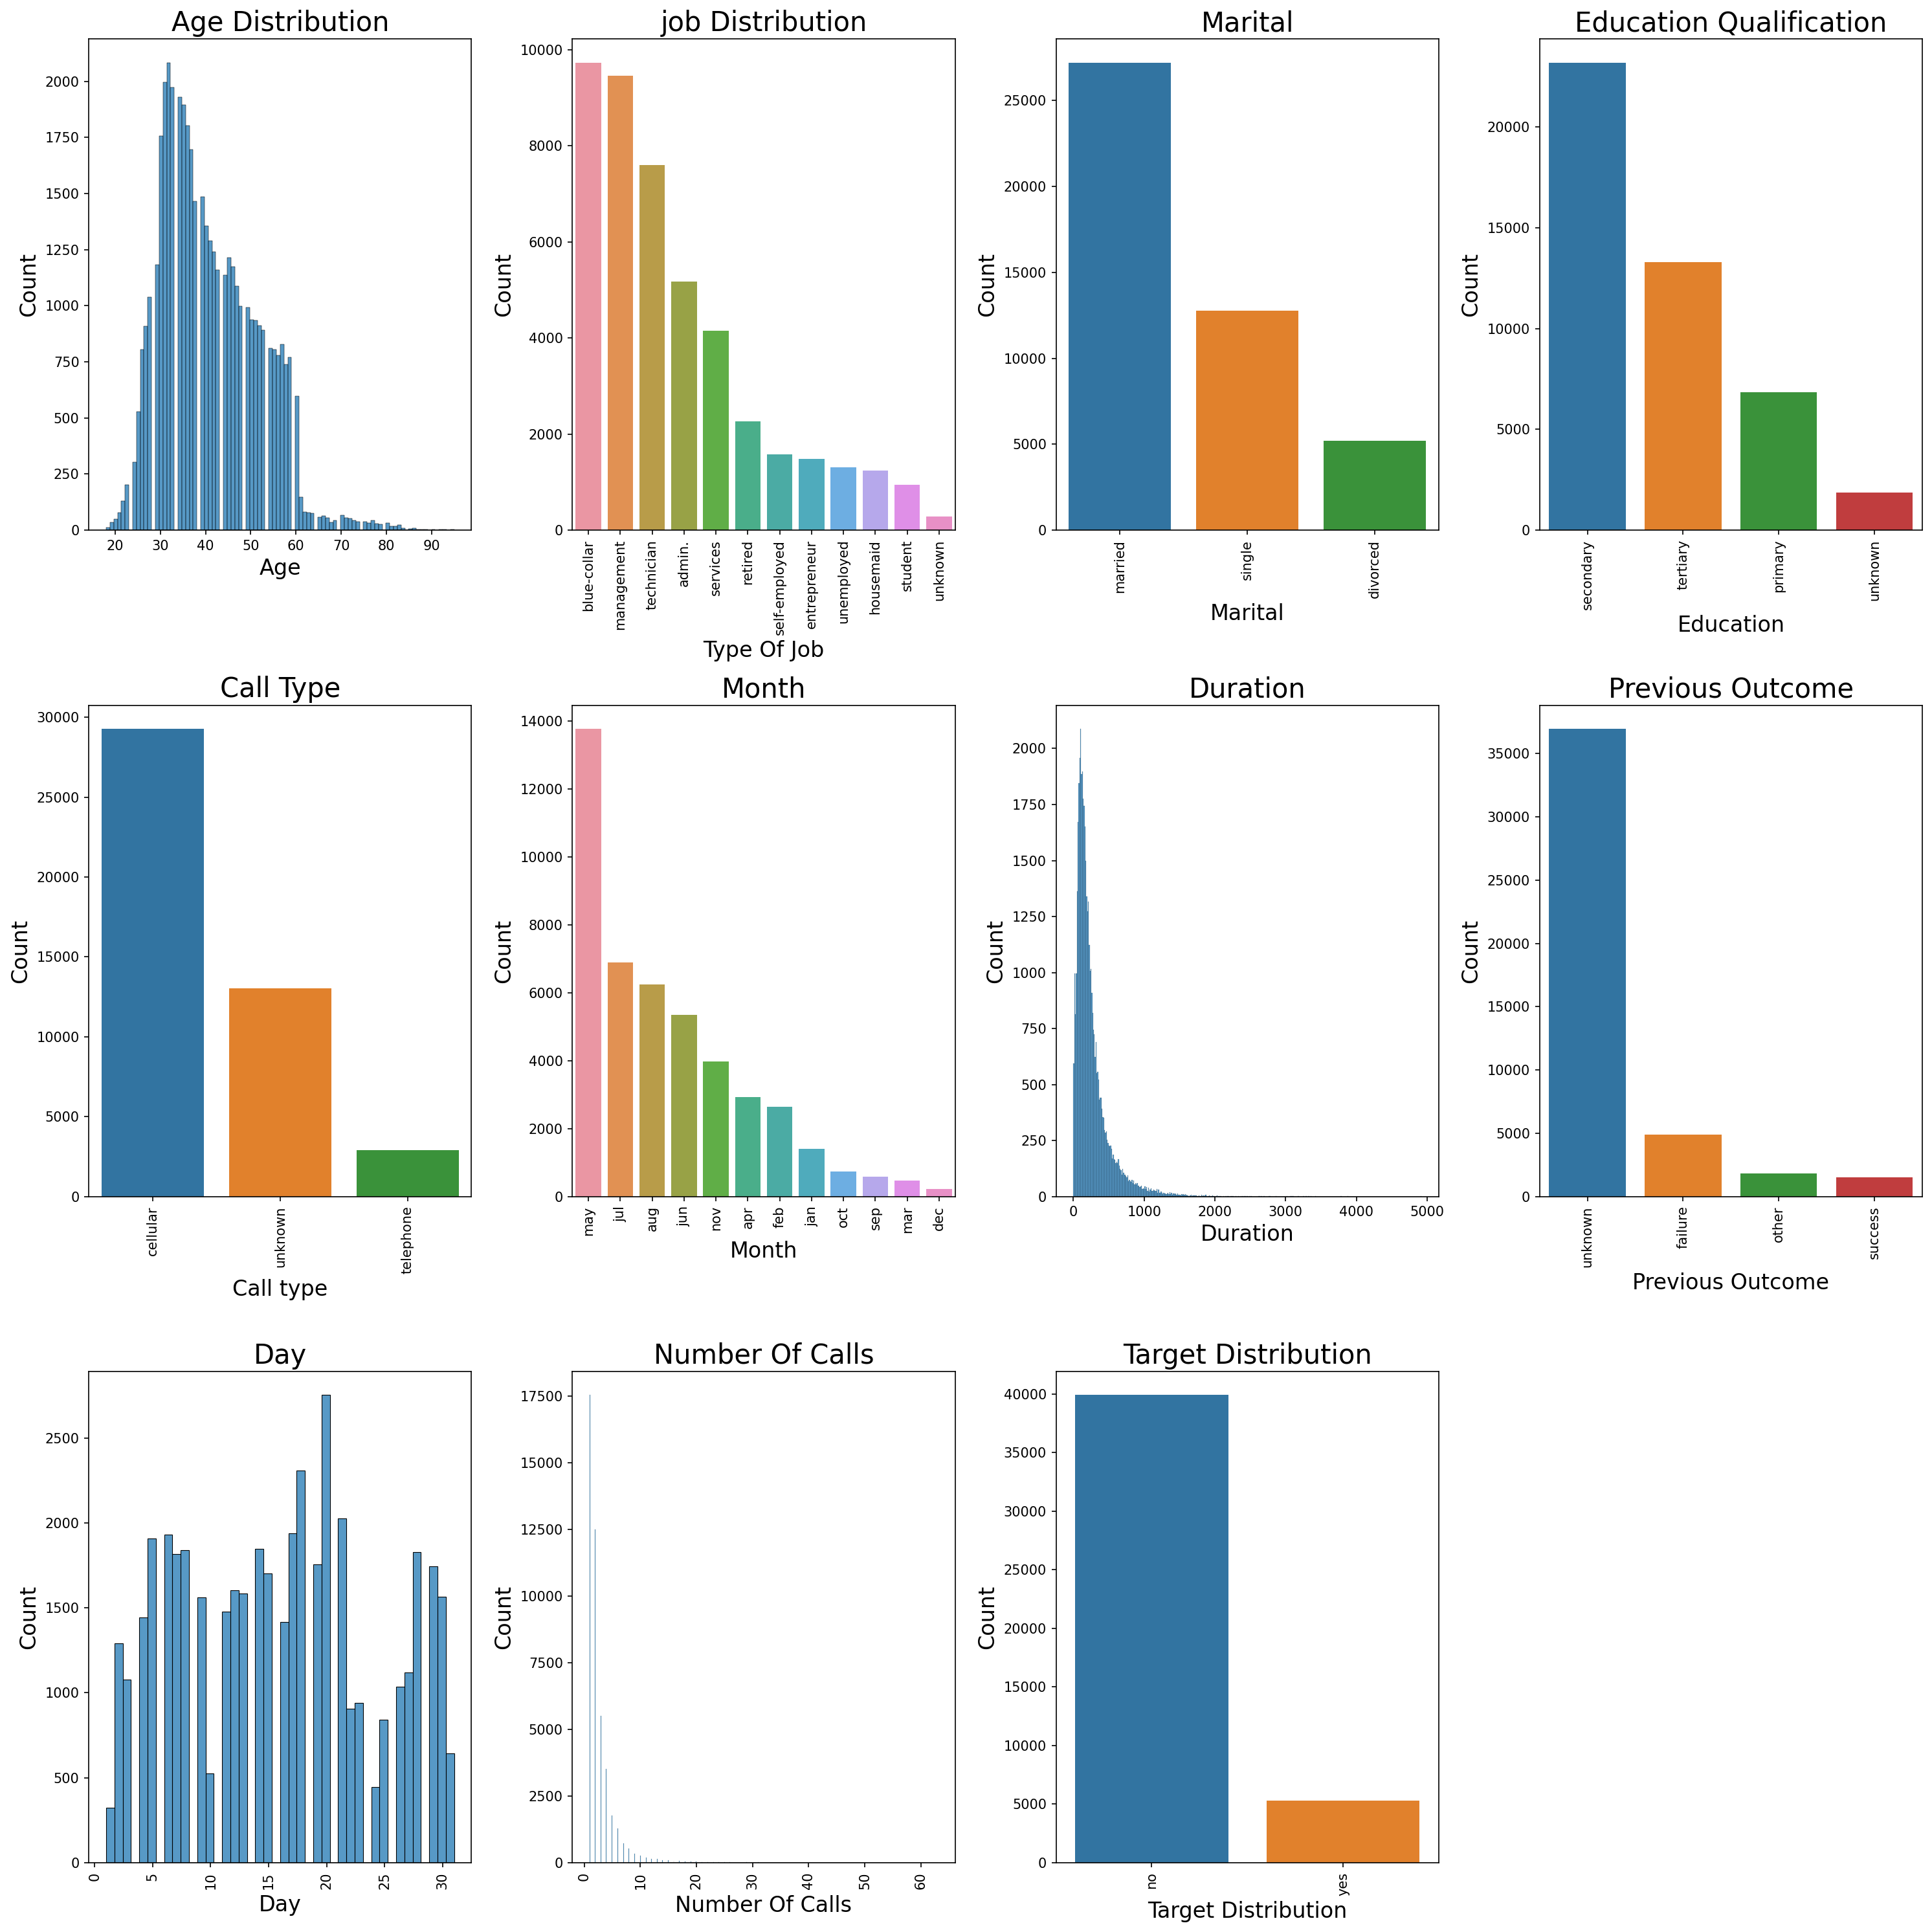

In [ ]:
# Age distribution 
plt.figure(figsize = (20,20),dpi=150)  
plt.subplot(3,4,1) 
sns.histplot(df.age) 
plt.title('Age Distribution', fontsize = 20) 
plt.xlabel('Age',fontsize = 16) 
plt.ylabel('Count',fontsize = 16)  
#Job distribution 
plt.subplot(3,4,2) 
sns.countplot(df['job'],order=df.job.value_counts().index) 
plt.title('job Distribution', fontsize = 20) 
plt.xlabel('Type Of Job',fontsize = 16) 
plt.xticks(rotation = 90) 
plt.ylabel('Count',fontsize = 16)  
# Marital distribution 
plt.subplot(3,4,3) 
sns.countplot(df['marital'],order=df.marital.value_counts().index) 
plt.title('Marital', fontsize = 20) 
plt.xlabel('Marital',fontsize = 16) 
plt.xticks(rotation = 90) 
plt.ylabel('Count',fontsize = 16)  
# Education qualification distribution 
plt.subplot(3,4,4) 
sns.countplot(df['education_qual'],order=df.education_qual.value_counts().index) 
plt.title('Education Qualification', fontsize = 20) 
plt.xlabel('Education',fontsize = 16) 
plt.xticks(rotation = 90) 
plt.ylabel('Count',fontsize = 16) 
 # Call type distribution 
plt.subplot(3,4,5) 
sns.countplot(df['call_type'],order=df.call_type.value_counts().index) 
plt.title('Call Type', fontsize = 20) 
plt.xlabel('Call type',fontsize = 16) 
plt.xticks(rotation = 90) 
plt.ylabel('Count',fontsize = 16)  
 # Mon distribution 
plt.subplot(3,4,6) 
sns.countplot(df['month'],order=df.month.value_counts().index) 
plt.title('Month', fontsize = 20) 
plt.xlabel('Month',fontsize = 16) 
plt.xticks(rotation = 90) 
plt.ylabel('Count',fontsize = 16)  
 # Dur distribution 
plt.subplot(3,4,7) 
sns.histplot(df.duration) 
plt.title('Duration', fontsize = 20) 
plt.xlabel('Duration',fontsize = 16) 
plt.ylabel('Count',fontsize = 16)  
 # Previous outcome  distribution  
plt.subplot(3,4,8) 
sns.countplot(df['prev_outcome'],order=df.prev_outcome.value_counts().index) 
plt.title('Previous Outcome', fontsize = 20) 
plt.xlabel('Previous Outcome',fontsize = 16) 
plt.xticks(rotation = 90) 
plt.ylabel('Count',fontsize = 16)  
# Day distribution 
plt.subplot(3,4,9) 
sns.histplot(df['day']) 
plt.title('Day', fontsize = 20) 
plt.xlabel('Day',fontsize = 16) 
plt.xticks(rotation = 90,fontsize = 10) 
plt.ylabel('Count',fontsize = 16)  
# Num call distribution 
plt.subplot(3,4,10) 
sns.histplot(df['num_calls']) 
plt.title('Number Of Calls', fontsize = 20) 
plt.xlabel('Number Of Calls',fontsize = 16) 
plt.xticks(rotation = 90) 
plt.ylabel('Count',fontsize = 16)  

 # Target distribution 
plt.subplot(3,4,11) 
sns.countplot(df['result']) 
plt.title('Target Distribution', fontsize = 20) 
plt.xlabel('Target Distribution',fontsize = 16)
plt.xticks(rotation = 90) 
plt.ylabel('Count',fontsize = 16)  

plt.tight_layout()
plt.show()

INTERPRETATION:

AGE



Company targets 30 to 40 ages people to sell their insurance plan



Less traget people are age between 25 to 29.

JOB


Most trageted people Blue collor and Management People



Students are least targeted for insurance plan

MARITAL STATUS




Married people are targeted the most and divorced people are least targeted

EDUCATIONAL QUALIFICATION



Secondary qualified people have been targeted thye most for insurance followed by tertiary and primary

CALL_TYPE


Cellur mode is most used for contacting the people for campaign

Month



May month is when maxmium calls are generated for new insurance customers,december is the least no of calls placed by the company

Duration


maximum number of calls lasted less than 1000 seconds

Previous Outcome


More unknown as status than failure and success

Day


Most number of calls are between in the mid of month

Number of Calls


Most People are contacted only 1 or 2 times by the company

Target


No of people subscribed is very less compared to Unsubcribed people

Features vs **Features**

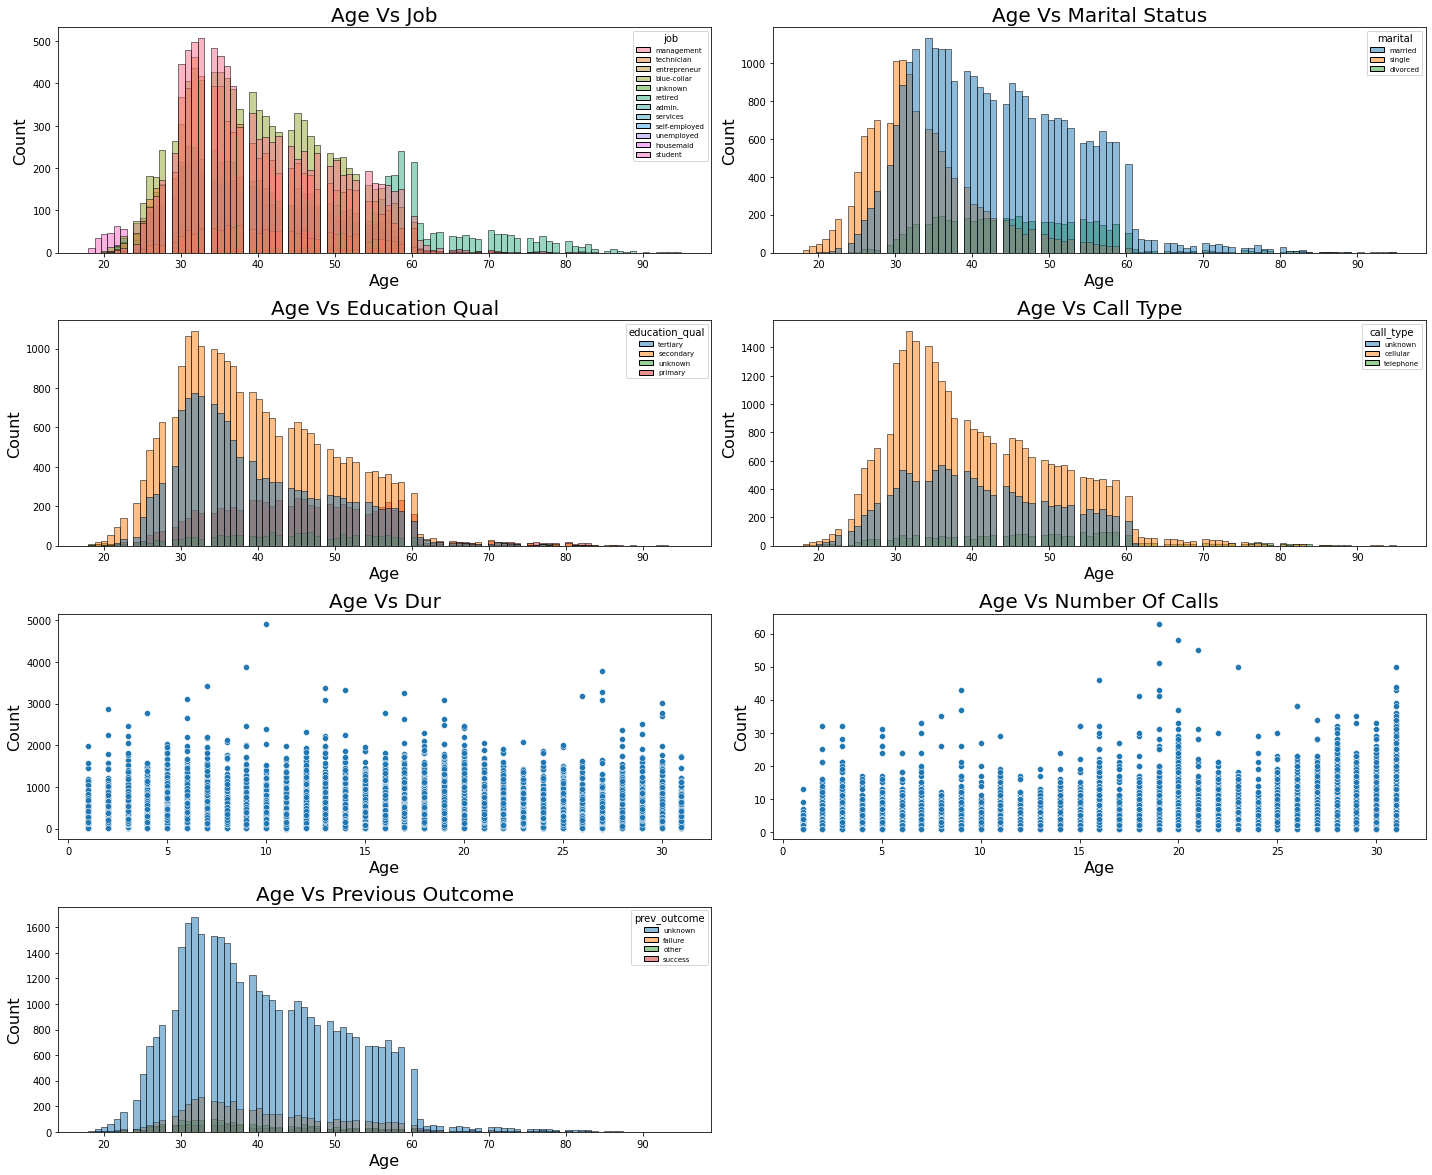

In [ ]:
# Age vs job
plt.figure(figsize = (20,20))
plt.subplot(5,2,1)
ax = sns.histplot(x = 'age',hue = 'job',data = df)
sns.move_legend(ax,"upper right",fontsize = 7)
plt.title('Age Vs Job',fontsize = 20)
plt.xlabel('Age',fontsize = 16) 
plt.ylabel('Count',fontsize = 16)  

# Age vs marital
plt.subplot(5,2,2)
ax = sns.histplot(x = 'age',hue = 'marital',data = df)
sns.move_legend(ax,"upper right",fontsize = 7)
plt.title('Age Vs Marital Status',fontsize = 20)
plt.xlabel('Age',fontsize = 16) 
plt.ylabel('Count',fontsize = 16) 

# Age vs education qual
plt.subplot(5,2,3)
ax = sns.histplot(x = 'age',hue = 'education_qual',data = df)
sns.move_legend(ax,"upper right",fontsize = 7)
plt.title('Age Vs Education Qual',fontsize = 20)
plt.xlabel('Age',fontsize = 16) 
plt.ylabel('Count',fontsize = 16) 

# Age vs call type
plt.subplot(5,2,4)
ax = sns.histplot(x = 'age',hue = 'call_type',data = df)
sns.move_legend(ax,"upper right",fontsize = 7)
plt.title('Age Vs Call Type',fontsize = 20)
plt.xlabel('Age',fontsize = 16) 
plt.ylabel('Count',fontsize = 16) 

# Age vs day
plt.subplot(5,2,5)
sns.scatterplot(x ='day' ,y = 'duration',data = df)
plt.title('Age Vs Dur',fontsize = 20)
plt.xlabel('Age',fontsize = 16) 
plt.ylabel('Count',fontsize = 16) 

# Age vs num calls
plt.subplot(5,2,6)
sns.scatterplot(x ='day' ,y = 'num_calls',data = df)
plt.title('Age Vs Number Of Calls',fontsize = 20)
plt.xlabel('Age',fontsize = 16) 
plt.ylabel('Count',fontsize = 16) 

# Age vs previous outcome
plt.subplot(5,2,7)
ax = sns.histplot(x = 'age',hue = 'prev_outcome',data = df)
sns.move_legend(ax,"upper right",fontsize = 7)
plt.title('Age Vs Previous Outcome',fontsize = 20)
plt.xlabel('Age',fontsize = 16) 
plt.ylabel('Count',fontsize = 16)


plt.tight_layout()
plt.show()

Plotting of Numerical data vs Target




Here we are plotting all our Numerical columns with target to figure out, is there any relation between numerical features column. Here we plot 2 type of numerical data:




Continous variable



discrete variable

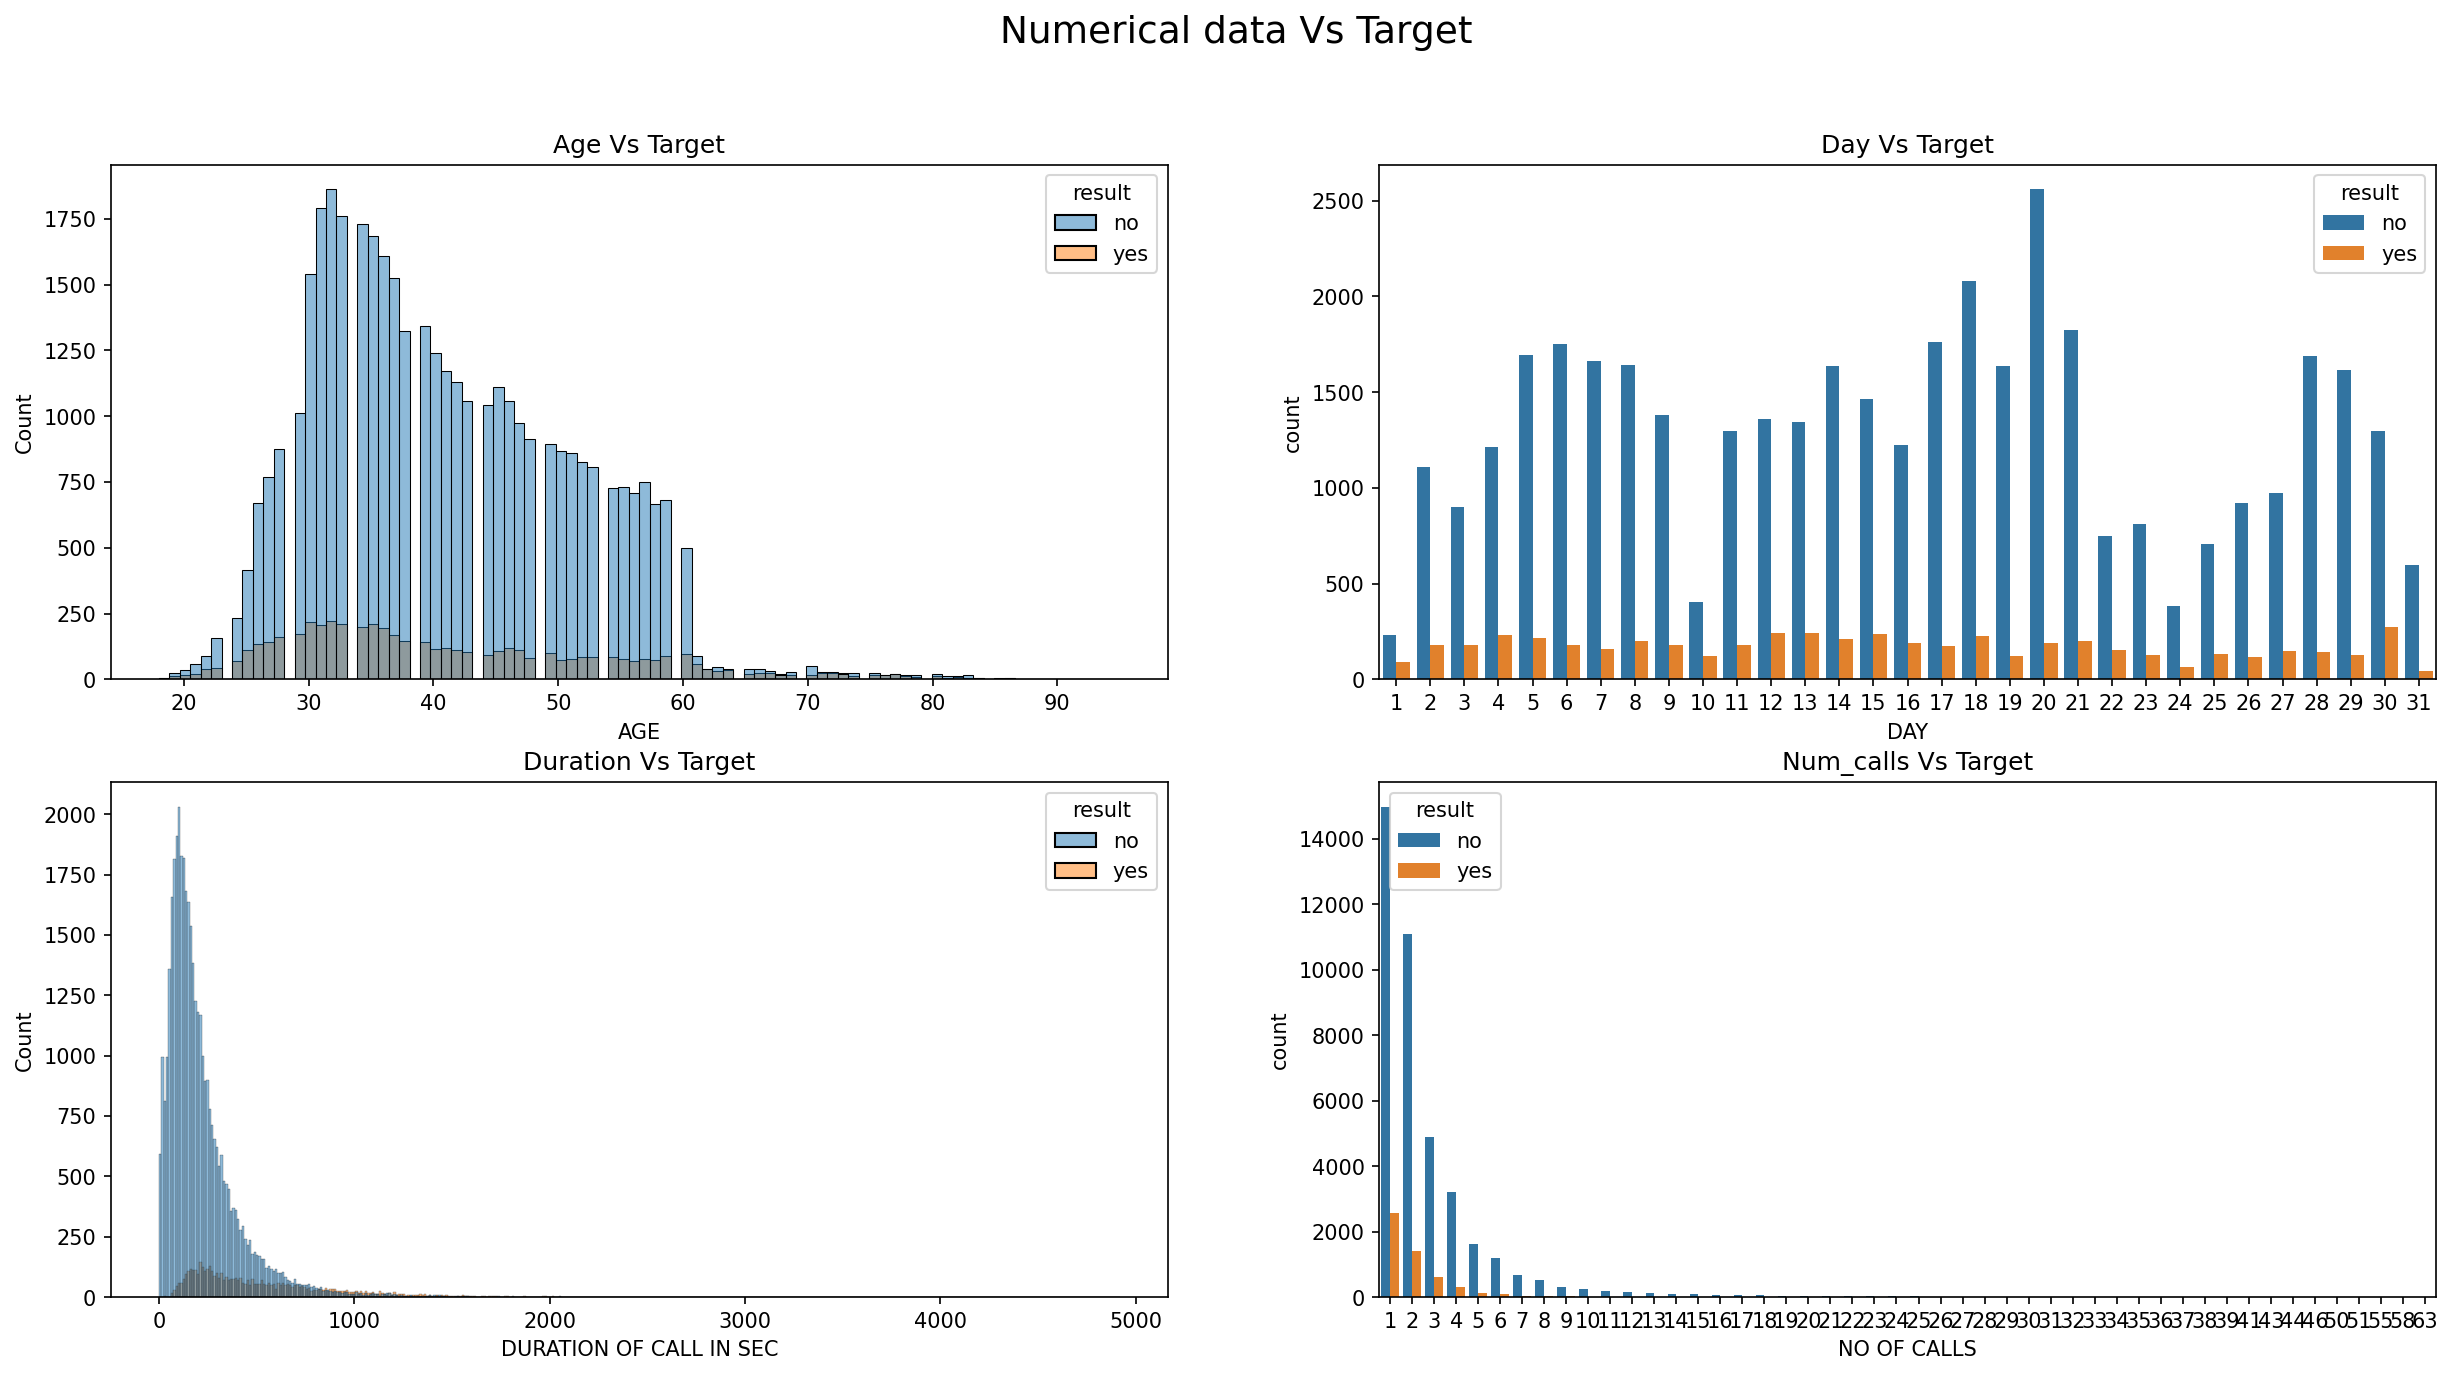

In [ ]:
plt.figure(figsize=(20, 10), dpi=150)
plt.subplot(2,2,1)
sns.histplot(x='age',hue='result',data=df)
plt.title("Age Vs Target",)
plt.xlabel("AGE")

plt.subplot(2,2,2)
sns.countplot(x='day',hue='result',data=df)
plt.title("Day Vs Target")
plt.xlabel("DAY")

plt.subplot(2,2,3)
sns.histplot(x='duration',hue='result',data=df)
plt.title("Duration Vs Target")
plt.xlabel("DURATION OF CALL IN SEC")

plt.subplot(2,2,4)
sns.countplot(x='num_calls',hue='result',data=df)
plt.title("Num_calls Vs Target")
plt.xlabel("NO OF CALLS")

plt.suptitle("Numerical data Vs Target", fontsize=18)  #suptitle to show title for overall plot 
plt.show()

INTERPRETATION:



AGE VS TARGET

Categorical Columns



Plotting of Categorical data vs Target



From the above plot



we can see Blue collar JOb type person have been contacted the most 

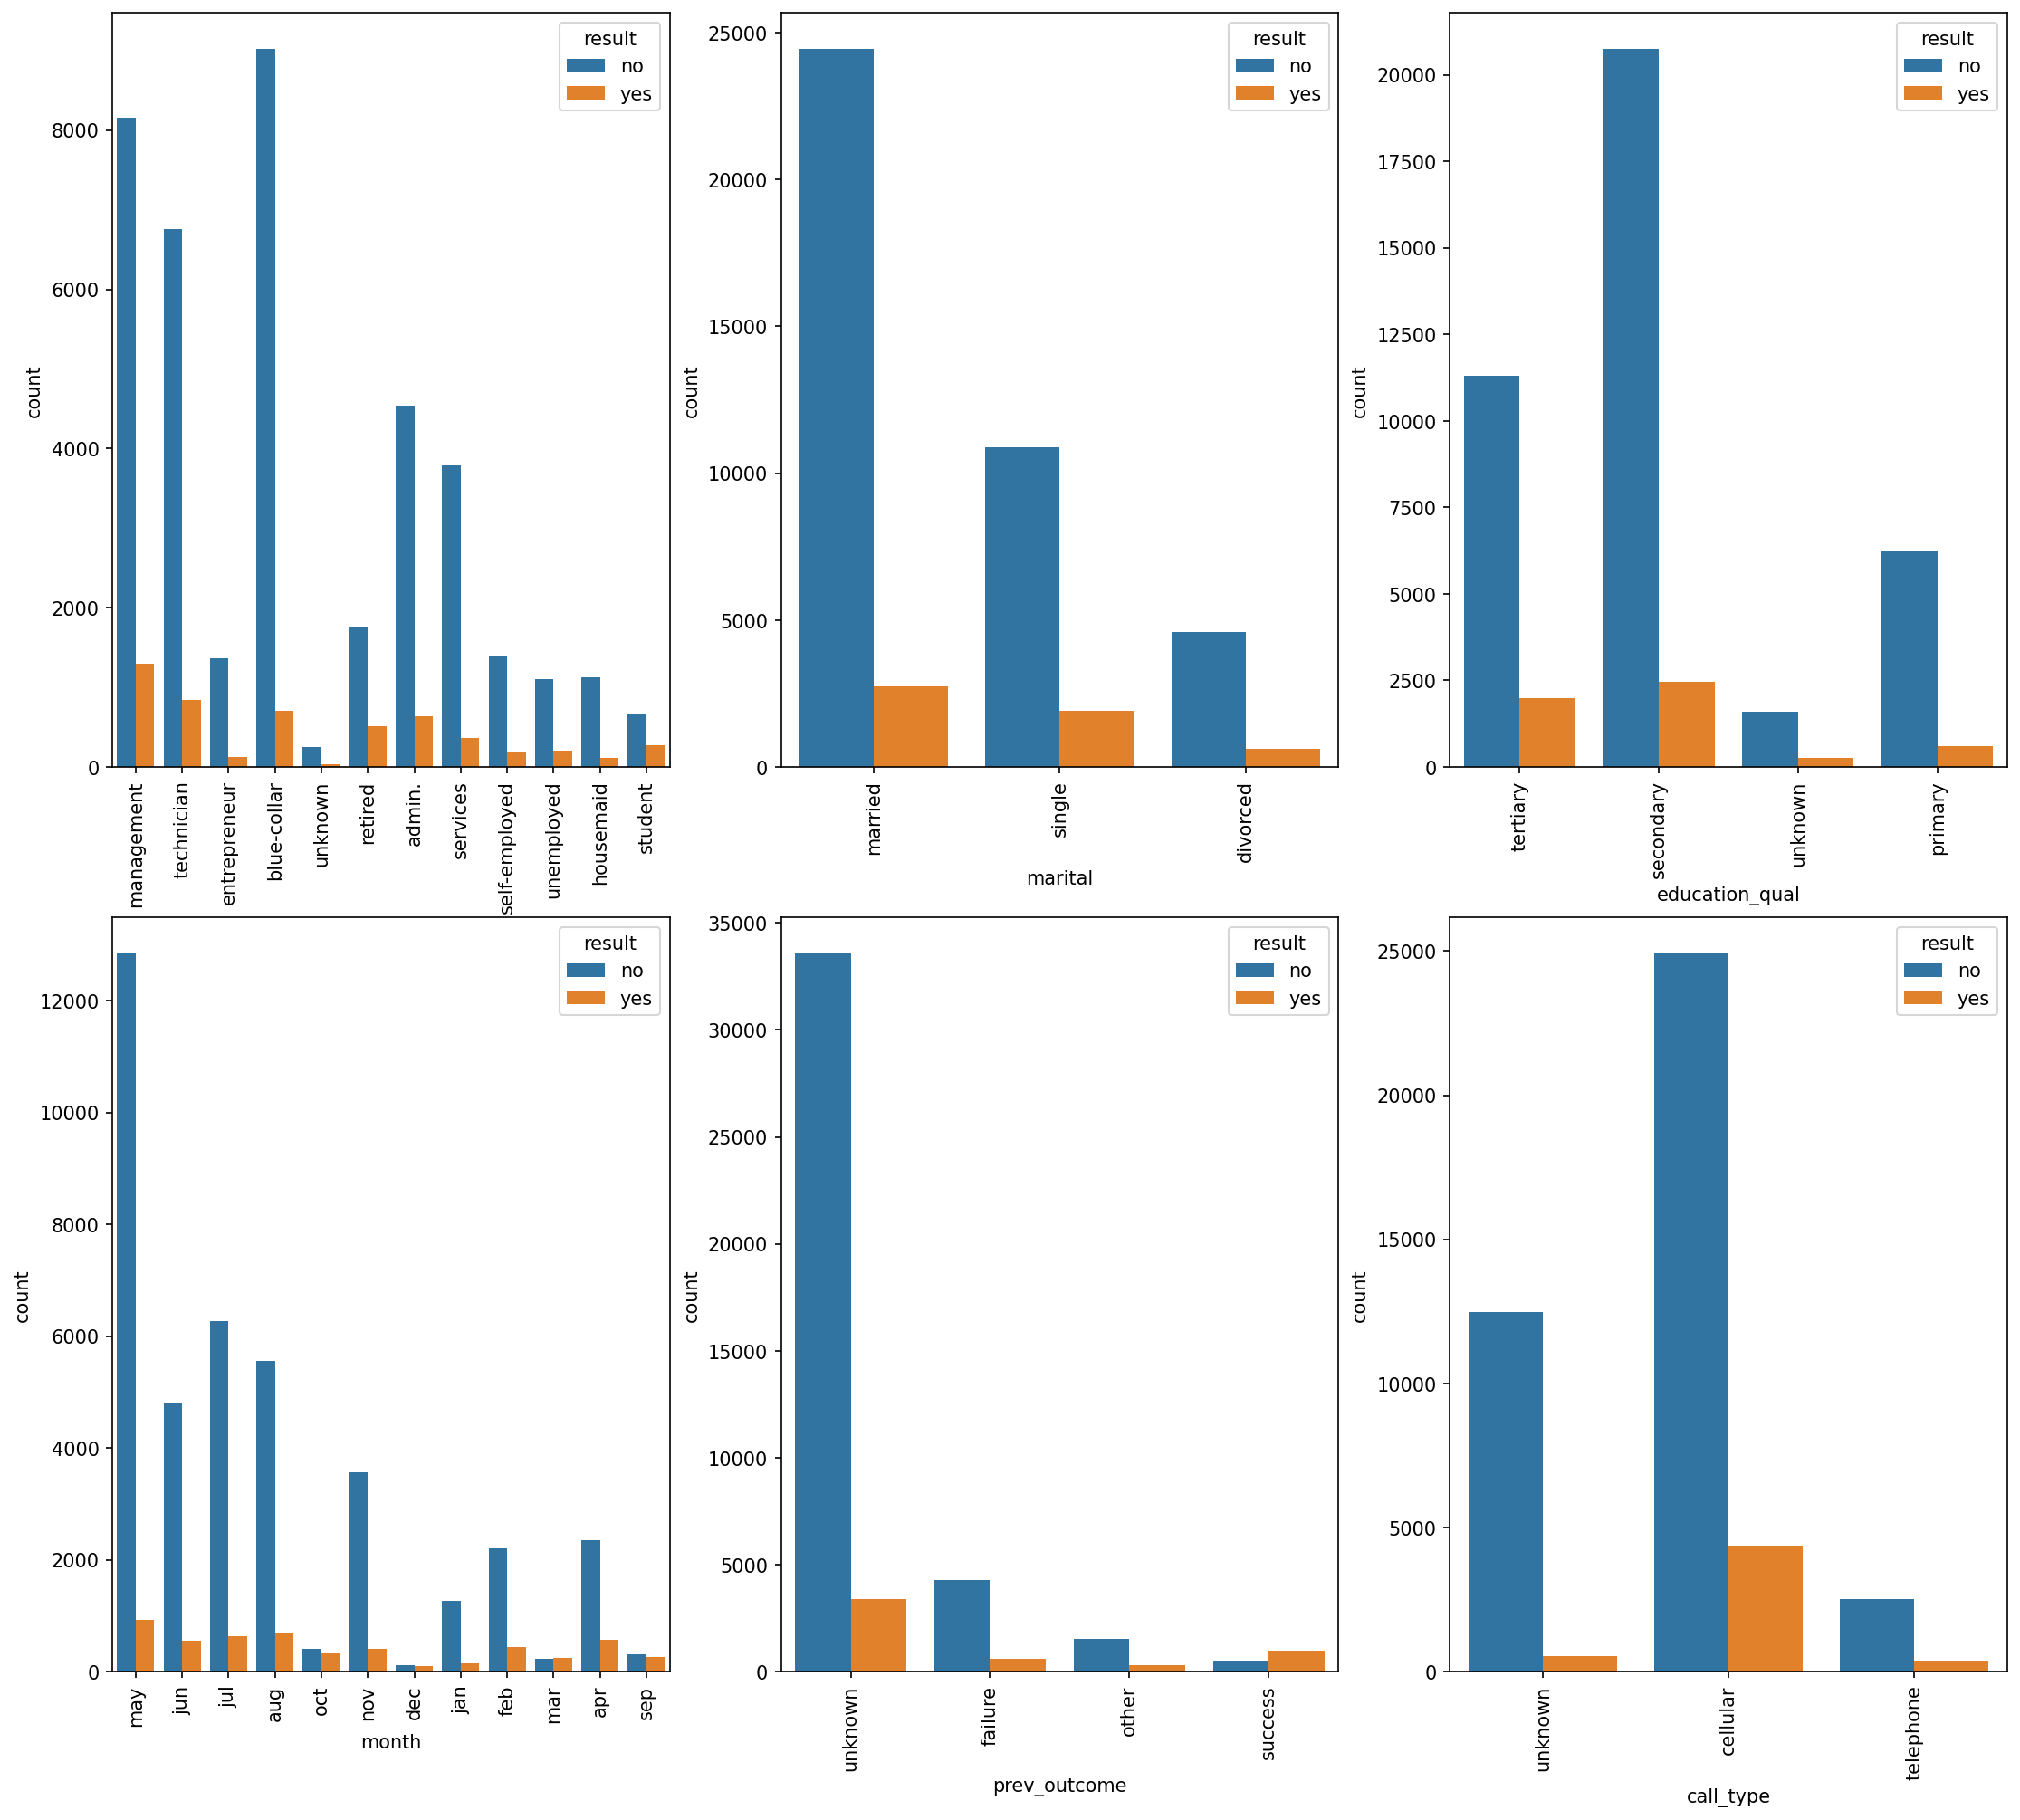

In [ ]:
plt.figure(figsize=(18,25), dpi=150)

plt.subplot(3,3,1)
sns.countplot(x='job',hue='result',data=df)
plt.xticks(rotation=90)

plt.subplot(3,3,2)
sns.countplot(x='marital',hue='result',data=df)
plt.xticks(rotation=90)

plt.subplot(3,3,3)
sns.countplot(x='education_qual',hue='result',data=df)
plt.xticks(rotation=90)

plt.subplot(3,3,4)
sns.countplot(x='month',hue='result',data=df)
plt.xticks(rotation=90)

plt.subplot(3,3,5)
sns.countplot(x='prev_outcome',hue='result',data=df)
plt.xticks(rotation=90)

plt.subplot(3,3,6)
sns.countplot(x='call_type',hue='result',data=df)
plt.xticks(rotation=90)

plt.show()


Data Encoding

In [ ]:
n_df = df.copy()
n_df = pd.get_dummies(n_df,columns=['job'],drop_first=True)
n_df['marital'] = n_df['marital'].map({'married':0,'single':1,'divorced':2})
n_df['education_qual'] = n_df['education_qual'].map({'secondary':0,'primary':2,'tertiary':1,'unknown':3})
n_df['call_type']= n_df['call_type'].map({'cellular':0,'unknown':1,'telephone':2})
n_df = pd.get_dummies(n_df,columns=['month'],drop_first=True)
n_df = pd.get_dummies(n_df,columns=['prev_outcome'],drop_first=True)
n_df['result'] = n_df['result'].map({'no':0,'yes':1})
n_df.head()

,age,marital,education_qual,call_type,day,duration,num_calls,result,job_blue-collar,job_entrepreneur,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,prev_outcome_other,prev_outcome_success,prev_outcome_unknown
0,58,0,1,1,5,261,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,44,1,0,1,5,151,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
2,33,0,0,1,5,76,1,0,0,1,...,0,0,0,1,0,0,0,0,0,1
3,47,0,3,1,5,92,1,0,1,0,...,0,0,0,1,0,0,0,0,0,1
4,33,1,3,1,5,198,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1


In [ ]:
X = n_df.drop('result',axis = 1)
y = n_df['result']

Splitting The **data**

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

Balance The Data And Model Building With Outliers **Data**

In [ ]:
from imblearn.combine import SMOTETomek
smt = SMOTETomek(sampling_strategy='all')
X_train, y_train = smt.fit_resample(X_train, y_train)

Data **Scaling**

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
# make scaler pickle file
import pickle as pkl
pkl.dump(sc,open('ccp_scaler.pkl','wb'))

**Logistic** Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

lr = LogisticRegression()
lr.fit(X_train,y_train)
     

LogisticRegression()

In [ ]:
from sklearn.metrics import plot_roc_curve, roc_curve, roc_auc_score, confusion_matrix, f1_score
lr.score(X_test,y_test)
     

0.8611879216900785

**KNN** Classifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
for i in [1,2,3,4,5,6,7,8,9,10,20]:
  knn = KNeighborsClassifier(i) #initialising the model
  knn.fit(X_train,y_train) # training the model
  print("K value  : " , i, " train score : ", knn.score(X_train,y_train) , " score : ", np.mean(cross_val_score(knn, X_train, y_train, cv=10)))

K value  :  1  train score :  0.999968343410681  score :  0.9088301624377116
K value  :  2  train score :  0.961600557155972  score :  0.9112521932030138
K value  :  3  train score :  0.9539080059514388  score :  0.9134996196268249
K value  :  4  train score :  0.9452341004780145  score :  0.9136422125877388
K value  :  5  train score :  0.9424958055019153  score :  0.9137687322075129
K value  :  6  train score :  0.9384437620690746  score :  0.913721366589289
K value  :  7  train score :  0.9366393364778879  score :  0.9132780756169143
K value  :  8  train score :  0.9335053341353002  score :  0.9132939911060678
K value  :  9  train score :  0.9331096267688119  score :  0.9122808995638927
K value  :  10  train score :  0.9308303523378392  score :  0.9122968526368522
K value  :  20  train score :  0.921776567792586  score :  0.9083081183577197


In [ ]:
knn = KNeighborsClassifier(5)
knn.fit(X_train,y_train)
knn.score(X_test,y_test)


0.8669394978431589

Decision **Tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth = 5)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [ ]:
y_pred = dt.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 1])

In [ ]:
roc_auc_score(y_test, dt.predict_proba(X_test)[:, 1])
     

0.8345668350802756

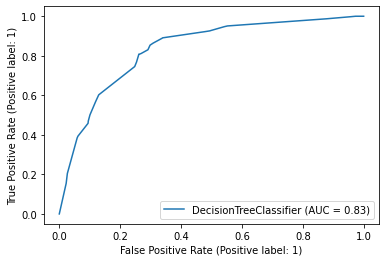

In [ ]:
plot_roc_curve(dt, X_test, y_test)
     

Random **Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators= 100, max_depth = 10, max_features='sqrt')
rf.fit(X_train, y_train)
predictions = rf.predict(X_test)
acc1 = roc_auc_score(y_test, predictions)
print("Test set auc: {:.2f}".format(acc1))

Test set auc: 0.78


In [ ]:
roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1])

0.8985541784719023

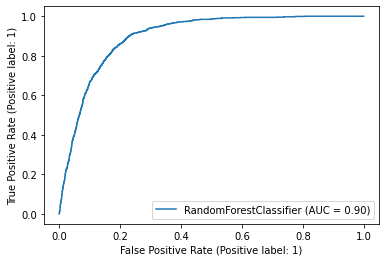

In [ ]:
plot_roc_curve(rf, X_test, y_test)

XG Boost

In [ ]:
import xgboost as xgb
from sklearn.model_selection import cross_val_score
import numpy as np
for lr in [0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.1,0.11,0.12,0.13,0.14,0.15,0.2,0.5,0.7,1]:
  model = xgb.XGBClassifier(learning_rate = lr, n_estimators=100, verbosity = 0) # initialise the model
  model.fit(X_train,y_train) #train the model
  model.score(X_test, y_test) 
  print("Learning rate : ", lr, " Train score : ", model.score(X_train,y_train), " Cross-Val score : ", np.mean(cross_val_score(model, X_train, y_train, cv=10)))
     

Learning rate :  0.01  Train score :  0.8479059166165437  Cross-Val score :  0.8457535159776025
Learning rate :  0.02  Train score :  0.865063788027478  Cross-Val score :  0.8631963909724097
Learning rate :  0.03  Train score :  0.8825698819209219  Cross-Val score :  0.8803860262807021
Learning rate :  0.04  Train score :  0.8980499540979455  Cross-Val score :  0.8917666007546929
Learning rate :  0.05  Train score :  0.9037164835860584  Cross-Val score :  0.8981612699077038
Learning rate :  0.06  Train score :  0.9098262053246383  Cross-Val score :  0.9028939881594974
Learning rate :  0.07  Train score :  0.9135775111589477  Cross-Val score :  0.9058064525181477
Learning rate :  0.08  Train score :  0.9164740890816423  Cross-Val score :  0.9085764441840638
Learning rate :  0.09  Train score :  0.9190541011111463  Cross-Val score :  0.9093204106176158
Learning rate :  0.1  Train score :  0.9203995061572067  Cross-Val score :  0.9101910119279475
Learning rate :  0.11  Train score :  0.92

In [ ]:
model = xgb.XGBClassifier(learning_rate = 0.5, n_estimators=100)
model.fit(X_train,y_train) #train the model
model.score(X_test, y_test)
     

0.8807654020572946

## Random Forest Classifier Performing Better Than Others For This Dataset, So It Will Be The Final **Model**

## **Feature Importance By Random Forest Classifier**

In [ ]:
from sklearn.feature_selection import RFE
estimator = RandomForestClassifier()
selector = RFE(estimator, n_features_to_select=3, step=1)
selector = selector.fit(X_train, y_train)
list(zip(["age","marital","education_qual","call_type","day","duration","num_calls","result","job_blue-collar","job_entrepreneur","month_jul","month_jun","month_mar","month_may","month_nov","month_oct","month_sep","prev_outcome_other","prev_outcome_success","prev_outcome_unknown"],selector.support_))

[('age', True),
 ('marital', False),
 ('education_qual', False),
 ('call_type', False),
 ('day', False),
 ('duration', True),
 ('num_calls', False),
 ('result', False),
 ('job_blue-collar', False),
 ('job_entrepreneur', False),
 ('month_jul', False),
 ('month_jun', False),
 ('month_mar', False),
 ('month_may', False),
 ('month_nov', False),
 ('month_oct', False),
 ('month_sep', False),
 ('prev_outcome_other', False),
 ('prev_outcome_success', False),
 ('prev_outcome_unknown', False)]

CONCLUSION



Logistic Regression - 0.86

K Nearest Neighbours - 0.86

Decision Tree - 0.83

Random Forest - 0.90

XG Boost - 0.88


### New Section

## The best Machine Learning algorithm for Customer conversion Prediction is RANDOM FOREST Model